## Envelope

In sound and music, an **envelope** describes how a sound changes over time. 

We have seen how the amplitude and timbre of a synthesized sound can be changed by varying its *constant* parameters (partial frequencies, amplitudes). But all *naturally occurring* sounds change over time to some extent.

Therefore, **time-variant** parameters are essential for any kind of "life-like" sound. It is the envelope of a wave, in conjunction with the timbre, which helps establish a sound’s unique quality.

We will now look at a few ways we can model (and therefore create) sounds that change over time.

### ADSR

One of the most common kinds of envelopes for modeling "real" sounds has four components:   

Attack   
Decay   
Sustain   
Release

(Commonly just referred to by its acronym, ADSR)

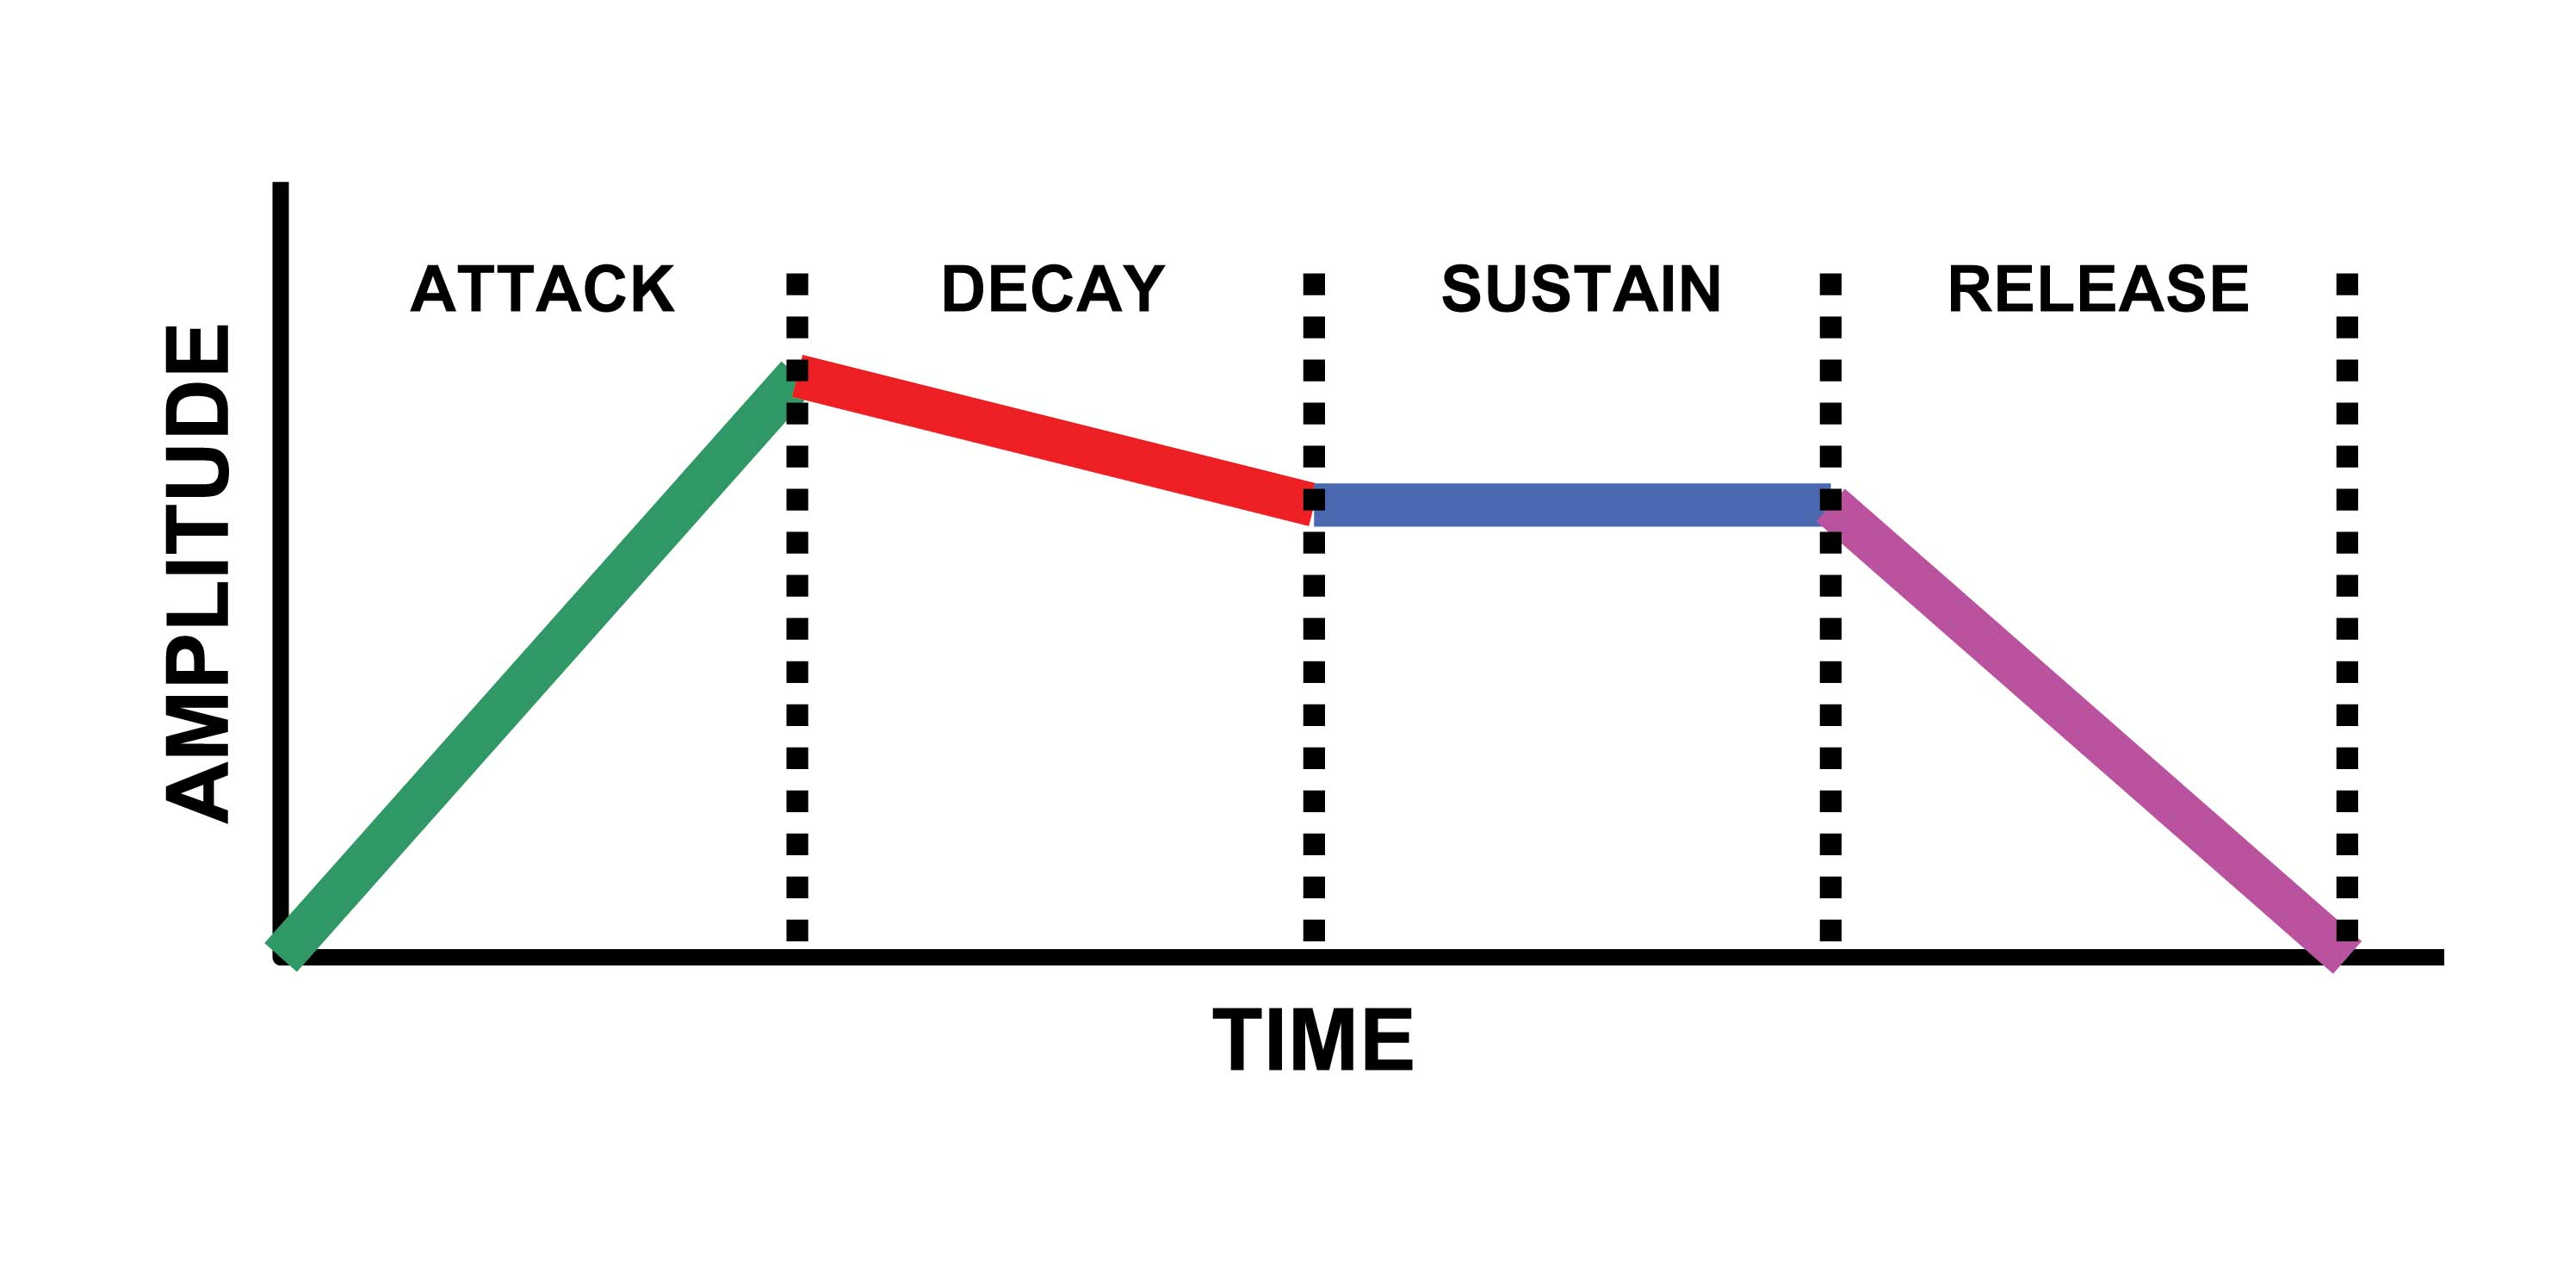

In [7]:
from IPython.display import Image, Audio
Image('../images/ADSR.jpg', width = 600, embed=True)

We can think of an ADSR envelope as a time-varying amplitude filter that *shapes* the amplitude of another signal. 

However, the attack, decay, and release are all technically **time parameters** while sustain is a **level parameter**.  

A --> The attack is the amount of time from sound onset (e.g., key strike) to peak amplitude  
D --> The decay is the amount of time to descend from the peak amplitude to the sustain level  
S --> Level of sustain  
R --> Time from sound offset (e.g., key release) to zero amplitude.

Since ADSR envelopes describe how the basic outline of a sound's amplitude varies *over time*, ADSR is a type of *temporal envelope*

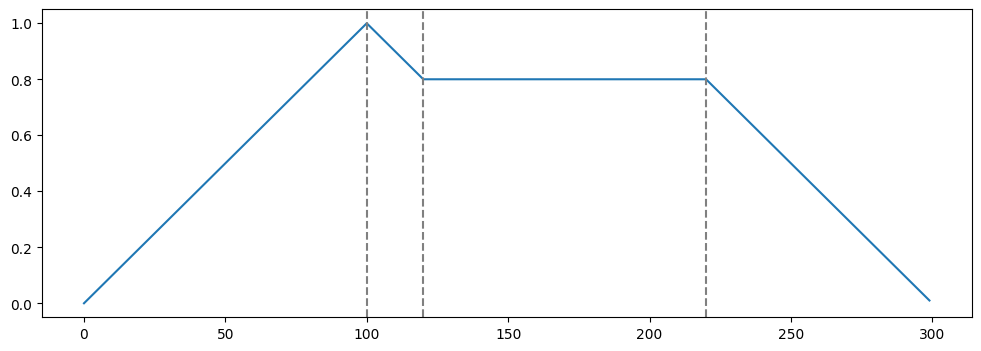

In [2]:
## Let's create a custom ADSR envelope
## For now, we'll manually draw our shape...
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,4)

a = np.arange(0,100)
d = np.arange(100,80,-1)
s = np.full(100, 80) # where last argument is level of sustain
r = np.arange(80,0,-1)
env = np.concatenate([a,d,s,r])/100

plt.plot(env)
xcoords = [100,120,220]
for xc in xcoords:
    plt.axvline(x=xc, ls='--', color = 'gray')


By multiplying one set of values with another of the same length, you modify the shape of one to "fit inside" the other. This becomes most apparent when one of the signals is moving slowly (like our ADSR envelope). 

The size of an ADSR envelope should have the same dimensions as your original sound. To get the effect, take the original signal and multiply by the ADSR array.

An important Fourier transform property is that *convolution* in one domain corresponds to *multiplication* in the other domain. (Where the "domains" are always *time* and *frequency*)

Thus, multiplication in the time domain corresponds to convolution in the frequency domain. (More on this later).

*Modulation* is the process of merging two signals to form a third signal with desirable characteristics of both. This always involves nonlinear processes such as multiplication.

In radio communication, modulation results in radio signals that can propagate long distances and carry along audio or other information. 

ValueError: operands could not be broadcast together with shapes (300,) (3000,) 

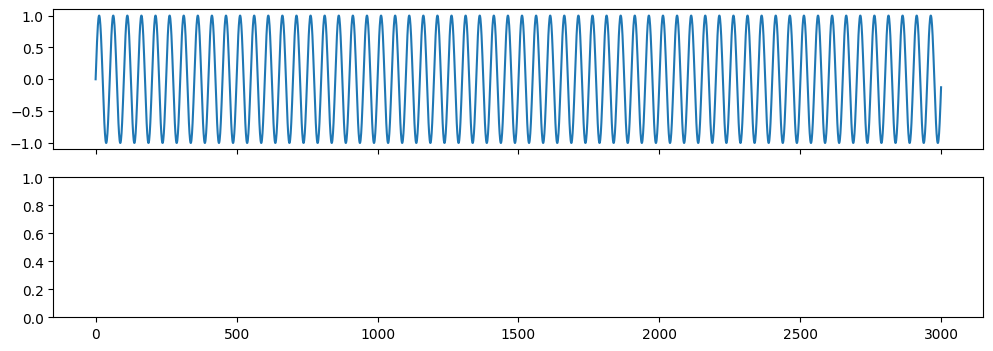

In [3]:
sixtyHertz=np.sin(2*np.pi * 60 *np.arange(3000) /3000)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(sixtyHertz)
ax2.plot(env * sixtyHertz)
ax2.set_ylim #only really need to see positive side

In [ ]:
from IPython.display import Audio
import numpy as np

#will not run in Chrom with rate below 3000 - modify signal accordingly
Audio(sixtyHertz, rate=300)

In [8]:
newSound = env * sixtyHertz
Audio(newSound, rate=300)

ValueError: operands could not be broadcast together with shapes (300,) (3000,) 

In [9]:
from scipy.io.wavfile import read
(fs, x) = read('../audio/flute-A4.wav')
(fs2,x2) = read('../audio/oboe-A4.wav')
(fs3,x3) = read('../audio/organ-C3.wav')
(fs4,x4) = read('../audio/marimbaNote.wav')

In [10]:
Audio('../audio/marimbaNote.wav')

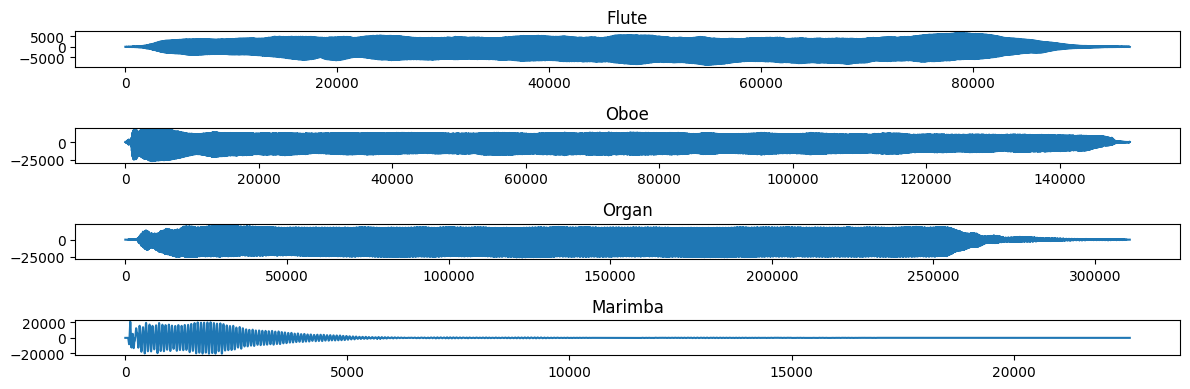

In [11]:
#plt.rcParams['figure.figsize'] = (12,4)
plt.subplot(4,1,1)
plt.plot(x)
plt.title('Flute')
plt.subplot(4,1,2)
plt.plot(x2)
plt.title('Oboe')
plt.subplot(4,1,3)
plt.plot(x3)
plt.title('Organ')
plt.subplot(4,1,4)
plt.plot(x4)
plt.title('Marimba')
plt.tight_layout()


## Transients and Onset
(taken from: [here](https://link.springer.com/chapter/10.1007/978-3-662-55004-5_32))

The **transient** part of a sound reflects a vibrating system immediately after excitation, which can be effected by a single impulse as in many idiophones (e. g., xylophones, gongs, bells, cymbals) and membranophones as well as in plucked strings, or by a sequence of pulses as in aerophones and in bowed chordophones where excitation continues with energy supply to a generator. 

*The transient portion of a sound can be defined as that from the absolute onset of vibration up to a point where vibration becomes either periodic with small fluctuations or where the peak amplitude is reached and the decay of the envelope begins (as in idiophones and membranophones excited by a single impulse).*

In comparison to periodicity of the steady state portion of the sound, the onset often lacks clear periodicity and can even appear chaotic. The onset of many sounds recorded from natural instruments includes noise in the transient portion.

For listeners, the transient part of sounds serves to distinguish various instruments as well as to mark the onset of notes. 

If attack transients and the final decay to zero amplitude are removed from natural instrument tones, identification scores drop significantly even for musically trained subjects where the effect is greatest for the attack removed.

## ADSR function...

Work on building your own ADSR function where A, D, and R should be arguments that take an amount of time (in absolute value, in seconds), and S is a sustain amplitude.

In [12]:
'''For example, here is one way you might start. However, consider problems you might run into if 
this were your final implementation of a function...'''

# at = 0.1 #attack duration in seconds
# fs = 5000 #sample rate
# susL = 0.8 #sustain level parameter
# dec = .5 # time from max to susL 
# rel = .2 #time from susL to release
# susD = ? # duration of Sustain parameter


# a = np.linspace(0,1,?)
# d = np.linspace(1,susL,?)
# s = np.full(?, susL)
# r = np.linspace(susL, 0, ?)


# env = np.concatenate([a,d,s,r])
#plot(env)


'For example, here is one way you might start. However, consider problems you might run into if \nthis were your final implementation of a function...'

### helpful reminder:

In [13]:
# np.zeros and np.ones will create an array of zeros (or ones) of length n.
x = np.zeros(10)
y = np.ones(10)
z = np.full(10,5)

In [14]:
z

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [15]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
# recall that np.arrays are not immutable, you can change values by indexing:
x[0:2] = 2.0
x

array([2., 2., 0., 0., 0., 0., 0., 0., 0., 0.])